# Project: Investigate a Dataset: A look at no-show appointments of patients in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Q1">Question 1</a></li>
<li><a href="#Q2">Question 2</a></li>
<li><a href="#Q3">Question 3</a></li>
<li><a href="#Q4">Question 4</a></li>    
<li><a href="#Q5">Question 5</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data set I chose was the no-show appointments from Brazil. While exploring statistics such as percentage of patients having co-morbidities could be studied with this data set, I also have an interest in public health, so I wanted to see what factors can be associated with missed (no-show) appointments.

- Independent Variables: Scheduling dates, age, alcoholism

- Dependent Variable: Appointment attendance

The purpose of this analysis is to identify any factors related to missed appointments for possible areas of intervention or measure the effectiveness of current efforts to increase attendance and improve public health.


### Questions about this dataset:
1. Does the length of time between scheduled date and appointment date correlate with missed appointments?
2. Are there certain patients that repeatedly miss appointments?
3. What conditions (diabetes, hypertension, handicapped) or demographics (gender, age) can be associated with no-show appointments versus non-missed appointments?
4. Does alcholism affect appointment attendance?
5. Do SMS reminders reduce the amount of no-show appointments?

In [1]:
# Import libraries that could be helpful

import csv
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define some functions

def func(pct, allvals):
    '''This function calculates the percentage of some total value'''
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

<a id='wrangling'></a>
## Data Wrangling

> I needed to see what kind of beast I will be handling: I had to look at the data structure and its types, what kinds of information can I gather and use, etc.

> After downloading the file, I renamed it within my working director to make it shorter while still remaining meaningful. A few columns could have been removed, as I ended up not needing them in the end.

### General Properties
First I will load the data and print out a few lines to see what I will be dealing with.

In [3]:
df=pd.read_csv('noshows2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Next, check the rows and columns for this dataset to get an idea of how large it is.

In [4]:
df.shape

(110527, 14)

Next, check datatypes for any that need to be changed.

In [5]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

The assignment suggested I try the pandas.explode() -- hint it won't work because there's no column with tuples.

In [6]:
# df.explode('PatientID')

### Formatting and Further Description
Here I will look at the metadata about this set, adjusting titles and types as needed, but not delving too deep into the values themselves.

First, I'll check each columns' number of unique values.

In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Convert any columns with 'Day' into the date type (AppointmentDay, ScheduledDay):

In [8]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

And then ensure that I performed the conversion correctly:

In [9]:
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

Next, to rename some columns to English and confirm the name change:

In [10]:
df.rename(columns={'Handcap':'Handicap','Hipertension':'Hypertension'},inplace = True)
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
No-show                        object
dtype: object

Next I wanted to look at some basic statistics about the dataset:

In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Next, I wanted to visualize each variable to get a general idea of trends:


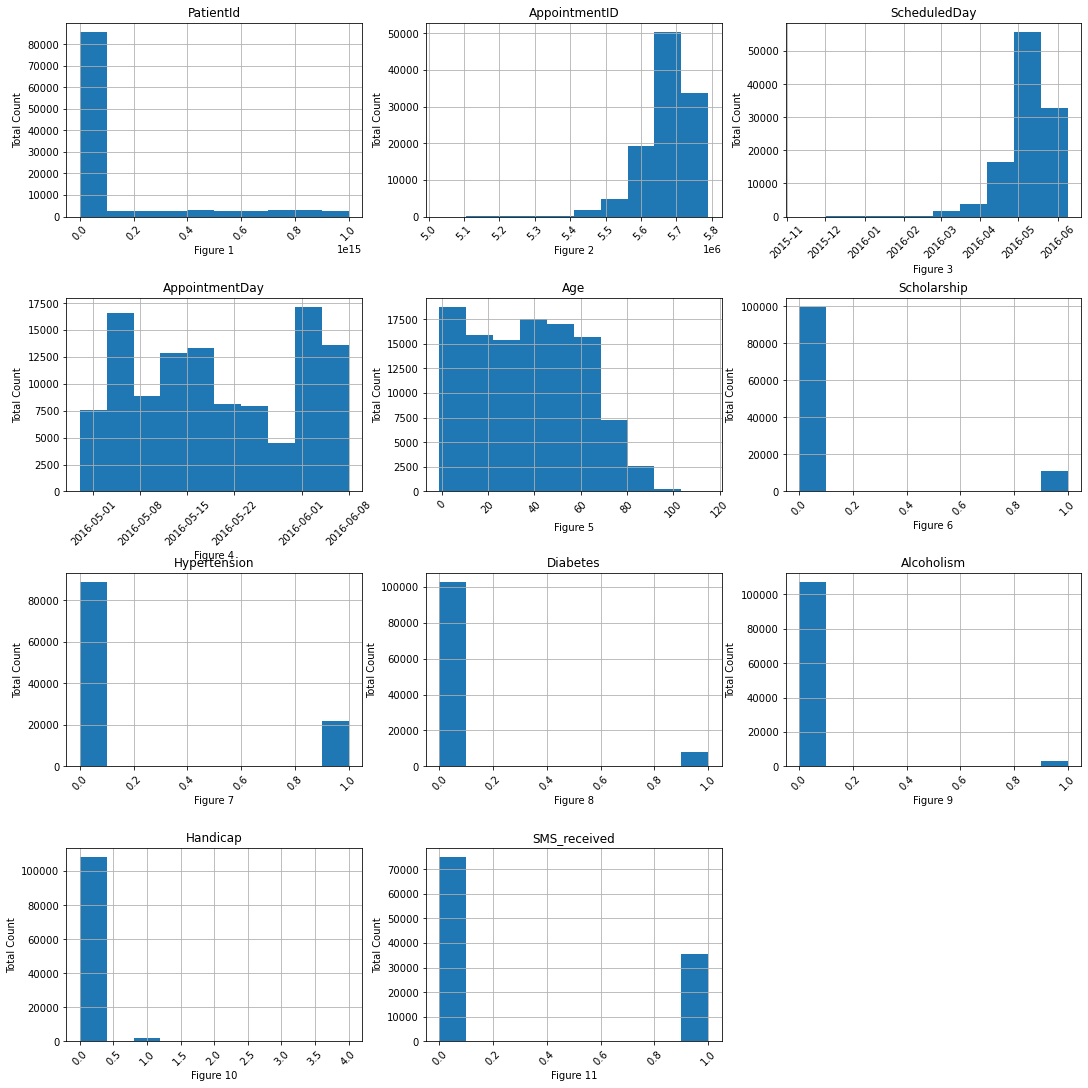

In [12]:
axarr=df.hist(xrot=45,figsize=(15,15),sharex=False)
plt.tight_layout(pad=1.0)

i = 0
for ax in axarr.flatten():
    i+=1
    ax.set_ylabel("Total Count")
    ax.set_xlabel("Figure " + str(i))

Figures 1-12. The above histograms represent the frequency distribution of the data in various ranges.

Figures 1-2. PatientID and AppointmentID are simply identifiers, so their actual values are not relevant to my analysis.

Figures 3-4. It looks like there are only 27 unique appointment days for 62,299 patients; the time of scheduling seems to be irrelevant and many people scheduling the same day. In the data, several PatientIDs have multiple appointment days.

Figures 6-9, 11. Scholarship, Hypertension, Diabetes, Alcoholism, and SMS_received have values of either 1 or 0 which means yes/has condition/received (1) or no/does not have condition/ did not receive (0). For the most part, the majority of patients had values of 0.

Figure 10. There is no other context for the different values of 'Handicap'. For example, the significance of the value '4'.

### Data Cleaning 
For this dataset, will have to deal with Null and duplicate values. First, I created a value for the count of unique PatientIDs.

In [13]:
uniquePat=len(pd.unique(df['PatientId']))
print("Number of Unique PatientIDs: ",uniquePat)

Number of Unique PatientIDs:  62299


Next, look for and replace any missing data.

In [14]:
df.isnull().values.any()

False

There were no null or missing values, no further steps needed. Next, look for any duplicate AppointmentIDs, since these should be unique to each event.

In [15]:
df.duplicated('AppointmentID').sum()

0

There were no duplicated AppointmentIDs, no further steps needed.  Next, get some summary statistics for the dataset.

In [16]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The statistics provided some interesting insights. For example, I interpreted the minimum age of -1 as the presense of a baby or newborn as a possible patient in this data set. 

As mentioned above, there isn't any other context for the values of 'Handicap', with a max value being 4.

Next, I grouped by some demographics for some quick comparisons:

In [17]:
df.groupby(["SMS_received","No-show"]).agg({"AppointmentID":"count"})

AppointmentID
SMS_received No-show               
0            No               62510
             Yes              12535
1            No               25698
             Yes               9784

In [18]:
df.groupby(["Gender","No-show"]).agg({"AppointmentID":"count"})

AppointmentID
Gender No-show               
F      No               57246
       Yes              14594
M      No               30962
       Yes               7725

In [19]:
df.groupby(["Hypertension","No-show"]).agg({"AppointmentID":"count"})

AppointmentID
Hypertension No-show               
0            No               70179
             Yes              18547
1            No               18029
             Yes               3772

In [20]:
df.groupby(["Scholarship","No-show"]).agg({"AppointmentID":"count"})

AppointmentID
Scholarship No-show               
0           No               79925
            Yes              19741
1           No                8283
            Yes               2578

In [21]:
df.groupby(["Diabetes","No-show"]).agg({"AppointmentID":"count"})

AppointmentID
Diabetes No-show               
0        No               81695
         Yes              20889
1        No                6513
         Yes               1430

By wrangling and cleaning up the data, I was able to identify a few areas of interest worth investigating and use in my research questions.
<a id='eda'></a>
## Exploratory Data Analysis

All questions revolved around patients with no-show (missed) appointments and non-missed (attended) appointments, so it was important to segment that out early.

<a id='Q1'></a>
### Research Question 1: Does the length of time between scheduled date and appointment date correlate with missed appointments?
First, I need to establish the length of time between the two dates for each patient and then confirm that the calculations were added to my dataframe


In [22]:
df['RevDifferences'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,RevDifferences
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


Second, separate the no-shows from those that did not miss their appointments ("no-miss") and count the records.

In [23]:
no_show = df[df['No-show'].isin(['Yes'])]
print("Total number of No-Show appointments: ", no_show['AppointmentID'].count())

Total number of No-Show appointments:  22319


In [24]:
no_miss = df[df['No-show'].isin(['No'])]
print("Total number of Non-Missed appointments: ", no_miss['AppointmentID'].count())

Total number of Non-Missed appointments:  88208


Next, calculate the average days between the Appointment Day and Scheduled Day for both the No-Show and No-Miss groups.

In [25]:
no_showMean = no_show['RevDifferences'].mean()
no_missMean = no_miss['RevDifferences'].mean()
print("Average days between Schedule Day and Appointment Day for No-Shows: ", no_showMean)
print("Average days between Schedule Day and Appointment Day for Non-Missed: ",no_missMean)

Average days between Schedule Day and Appointment Day for No-Shows:  14.83148886598862
Average days between Schedule Day and Appointment Day for Non-Missed:  7.754659441320515


Visualize and create a boxplot to show the variance between No-Shows and Non-Missed.

[Text(0, 0, '7.75466'), Text(0, 0, '14.8315')]

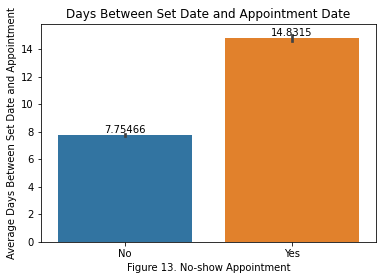

In [26]:
Ddiff = sns.barplot(y='RevDifferences',x='No-show',data=df)
Ddiff.set(xlabel='Figure 13. No-show Appointment',ylabel='Average Days Between Set Date and Appointment',title="Days Between Set Date and Appointment Date")
Ddiff.bar_label(Ddiff.containers[0])

Figure 13. Number of days passed between Set Date and Appointment Date for No-show appointments and Non-missed appointments.

##### Conclusion for Q1: Does the length of time between scheduled date and appointment date correlate with missed appointments?
Those that miss their appointments ('No-show') have, on average, about 15 days between their scheduled date and appointment date. On the other hand, those that did not miss their appointment, on average, only had a week (8 days) between their scheduled date and appointment.
<a id='Q2'></a>
### Research Question 2  Are there certain patients that repeatedly miss appointments?

This question involves looking at duplicate PatientIds, since all entries have unique AppointmentIDs. First, I will have to determine duplicate and unique PatientId values from no_show and no_miss. Then determine the percentage of total that have multiple appointments (AppointmentIDs). Could also ask: Are no-shows more likely to miss again? Ask, what percentage of all appointments are missed?

First, segment out which PatientIDs are duplicated within each list (no-shows vs no-miss):

In [27]:
no_showDup = no_show[no_show.duplicated(['PatientId'], keep = False)]
no_missDup = no_miss[no_miss.duplicated(['PatientId'], keep = False)]

Next, aggregate the data by PatientIDs that had more than one missed appointment:

In [28]:
no_showDup.groupby(["PatientId"]).agg({"AppointmentID":"count"})

,AppointmentID
PatientId,
1.224513e+08,2
5.225847e+08,3
2.237714e+09,2
3.996325e+09,3
4.211396e+09,3
...,...
9.972256e+14,4
9.975988e+14,2
9.982316e+14,2


This code shows that 3,226 unique Patients have missed at least 2 appointments.

I next grouped the data by PatientIDs that had more than one non-missed appointment:

In [29]:
no_missDup.groupby(["PatientId"]).agg({"AppointmentID":"count"})

,AppointmentID
PatientId,
2.263866e+07,2
5.216894e+07,2
7.922850e+07,2
1.562232e+08,2
1.781682e+08,2
...,...
9.996275e+14,3
9.997437e+14,2
9.998318e+14,4


Overall, however, 18,444 Patients will return for another appointment.
#### CALCULATIONS FOR NO-SHOWS

In [30]:
# total count of all unique no-shows 
no_showCnt = no_show['PatientId'].nunique()

# total count of all unique no-shows that had more than one missed appointment
no_showDupCnt = no_showDup['PatientId'].nunique()
print("No-Show Repeats: ", no_showDupCnt)

# total count of all unique no-shows that only missed one appointment ('solos')
no_showUCnt =  no_showCnt - no_showDupCnt

# percentage of duplicate no-shows out of all no-shows
no_showPer = (no_showDupCnt/no_showCnt)*100

No-Show Repeats:  3226


The above code got the total count of unique Patients who have missed appointments, the number of Patients with >1 missed appointment, the number of Patients who've only missed appointments once, and the percentage of repeat offenders of all no-shows.

#### CALCULATIONS FOR NO-MISSES

In [31]:
# total count of all unique non-missed appointments
no_missCnt = no_miss['PatientId'].nunique()

# total count of all unique PatientId's that attended more than one appointments
no_missDupCnt = no_missDup['PatientId'].nunique()
print("Repeat Attendees: ", no_missDupCnt)

# total count of all unique non-missed appointments only attended once ('solos')
no_missUCnt = no_missCnt - no_missDupCnt

#percentage of duplicate no-misses out of all non-missed
no_missPer = (no_missDupCnt/no_missCnt)*100

Repeat Attendees:  18444


The above code got the total count of unique Patients who have haven't missed appointments, the number of Patients with >1 attended appointments, the number of Patients who've only attended appointments once, and the percentage of repeat attendees of all non-missed appointments.

Next, I needed the total count of all unique Patients in the dataset.

In [32]:
# total count of all unique PatientIds
all_PatientIds = df['PatientId'].nunique()
print("All Patients: ",all_PatientIds)
print("No-Show Repeats as % of All: ", (no_showDupCnt/all_PatientIds)*100)

# Confirm the percentages
print(no_showPer)
print(no_missPer)

All Patients:  62299
No-Show Repeats as % of All:  5.178253262492174
18.264168034875166
34.05842597038077


And visualize the data:

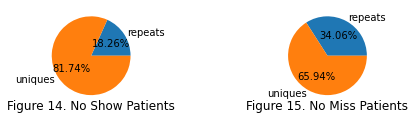

In [33]:
# no-show graph
repeats = ['repeats','uniques']
# include unique duplicates and unique solos
noshows = [no_showDupCnt,no_showUCnt]
nomiss = [no_missDupCnt,no_missUCnt]

plt.subplot(1,3,1)
plt.pie(noshows, labels = repeats, autopct='%1.2f%%')
plt.title("Figure 14. No Show Patients",y=-0.1)

plt.subplot(1,3,3)
plt.pie(nomiss, labels = repeats, autopct='%1.2f%%')
plt.title("Figure 15. No Miss Patients",y=-0.1);

Figures 14-15. Graphical representation of all unique and repeat No-Show and Non-Missed Patients.

### Conclusion Q2:  Are there certain patients that repeatedly miss appointments?
It appears that patients who do not miss their appointments are more likely to return compared to those that have missed at least one appointment; that is, the number of patients that return (No-Miss Repeats) is greater than the number of patients that have missed more than one appointments (No-Show Repeats).

Of all the no-show appointments, 18% are repeat patients; of the no-miss appointments, 34% are repeat patients. Overall, the majority of all appointments are unique individuals. This can be interpreted as the majority of  No-Show appointments simply being one-offs with patients, with a small subset of all patients (~5%) missing more than one appointment. 

However, these two groups are not mutually exclusive, as some PatientIds can have least 1 no-show and 1 no-miss appointment. In fact, the number of missed and attended appointments can vary per PatientId (e.g., 3 attended appointments with 1 miss):

In [34]:
# Calculate the number of PatientIds that are in both no-miss and no-show
common = no_miss.merge(no_show, on=['PatientId'])
result2 = df[df['PatientId'].isin(common.PatientId)]
result2['PatientId'].nunique()

9518

In [35]:
# List of PatientIds that have both Missed and Attended Appointments
result2.groupby(["PatientId","No-show"]).agg({"AppointmentID":"count"})

AppointmentID
PatientId    No-show               
6.485121e+07 No                   1
             Yes                  1
8.799645e+07 No                   1
             Yes                  1
1.421333e+08 No                   1
...                             ...
9.994717e+14 Yes                  1
9.994792e+14 No                   1
             Yes                  2
9.996275e+14 No                   3
             Yes                  1

[19036 rows x 1 columns]

<a id='Q3'></a>
## Research Question 3: What conditions (diabetes, hypertension, handicapped, alcoholism) or demographics (gender, age) can be associated with no-show appointments versus non-missed appointments?

First, Decide on what factors could be influential. Visualize No-Show appointments:

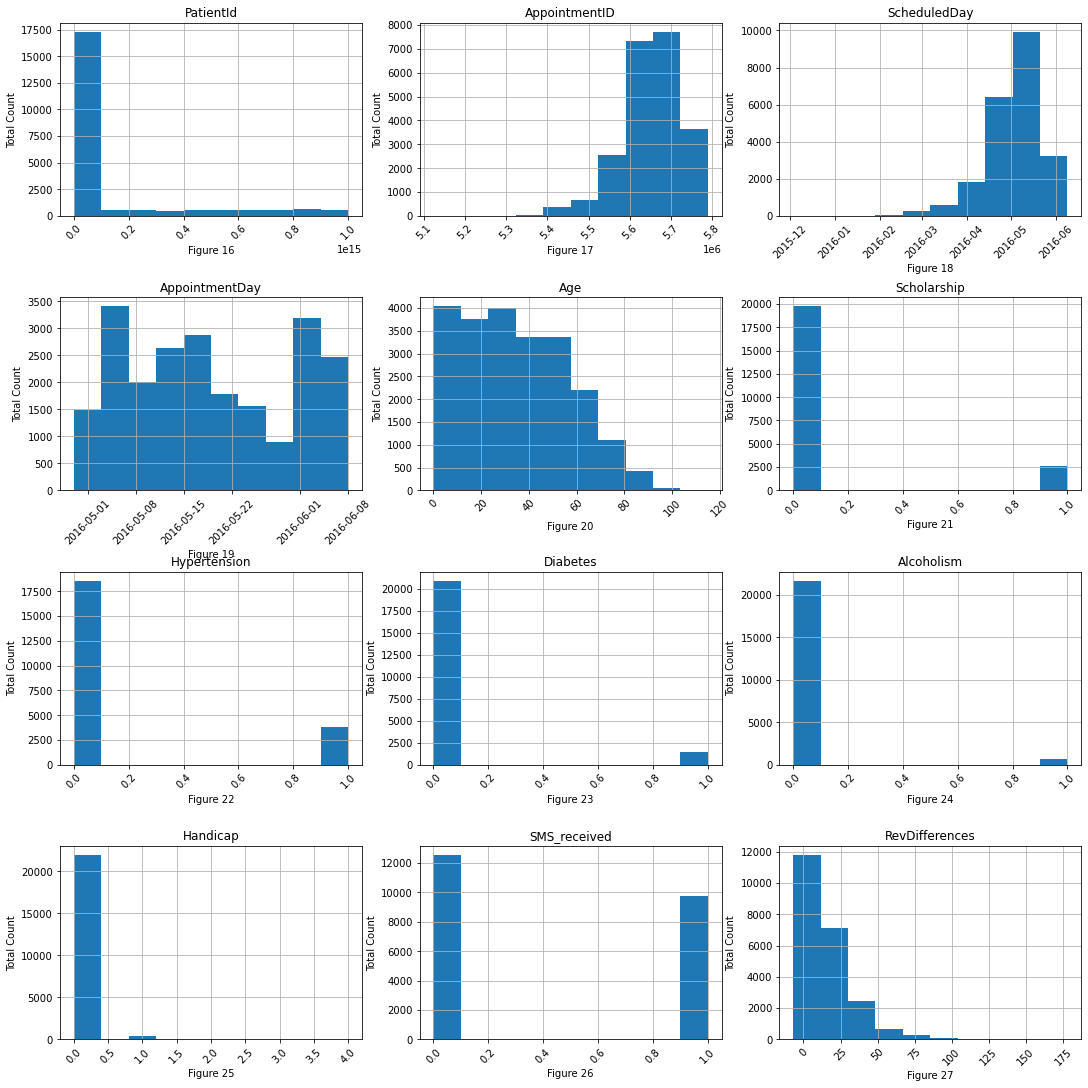

In [36]:
axarr=no_show.hist(xrot=45, figsize=(15,15))
plt.tight_layout(pad=1.0)
i=15

for ax in axarr.flatten():
    i+=1
    ax.set_ylabel("Total Count")
    ax.set_xlabel("Figure " + str(i))

Figures 16-27. Sample histogram representation for No-Show appointments

Next, visualize the non-missed appointments

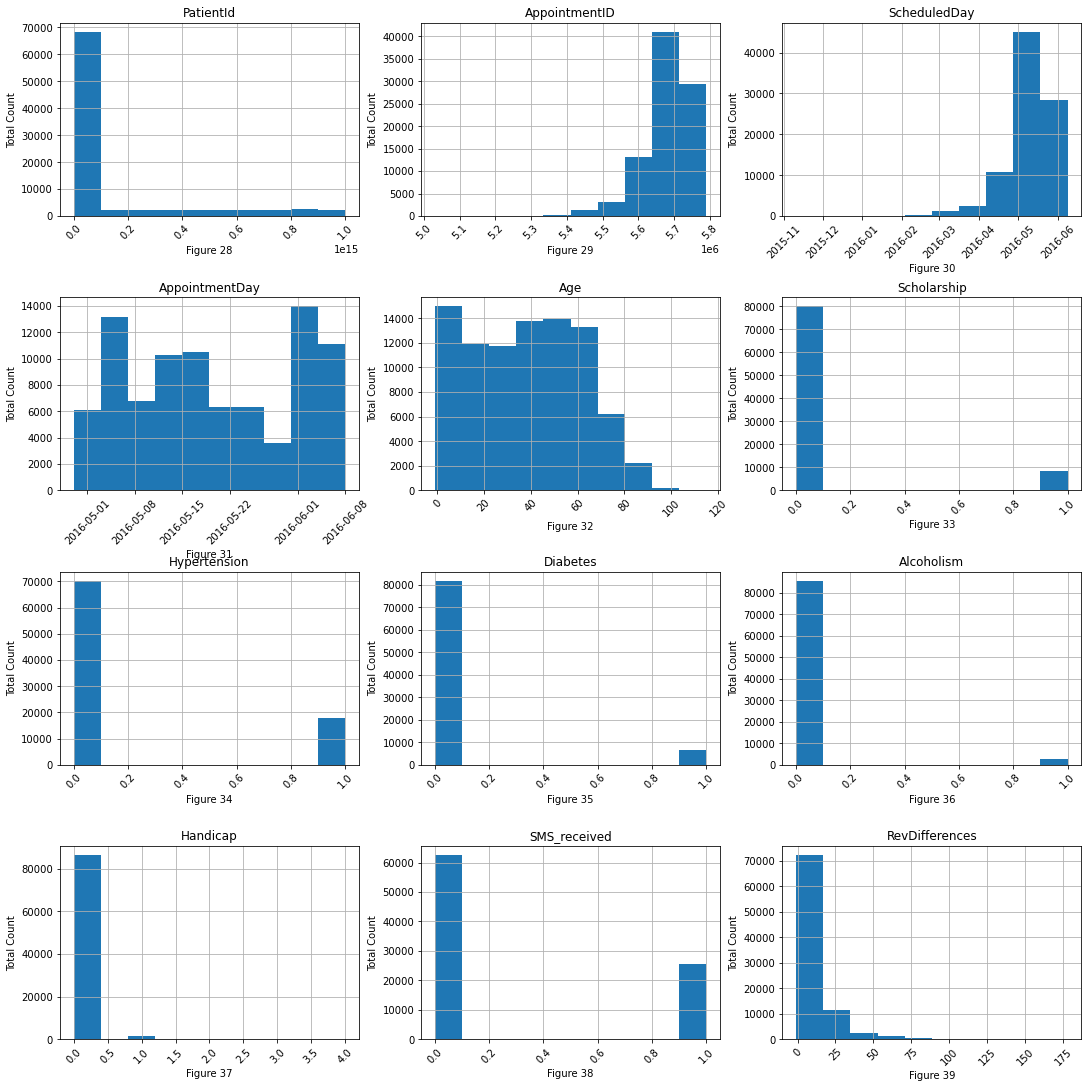

In [37]:
axarr=no_miss.hist(xrot=45, figsize=(15,15))
plt.tight_layout(pad=1.0)

for ax in axarr.flatten():
    i+=1
    ax.set_ylabel("Total Count")
    ax.set_xlabel("Figure " + str(i))

Visually, Age seems to be skewed towards younger patients for No-shows and older patients in non-missed appointments; let's quantify:

In [38]:
# statistics on the no-show group
print(no_show['Age'].describe())
print("Median: ",no_show['Age'].median())

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64
Median:  33.0


In [39]:
# statistics on non-missed group
print(no_miss['Age'].describe())
print("Median: ", no_miss['Age'].median())

count    88208.000000
mean        37.790064
std         23.338878
min         -1.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64
Median:  38.0


Let's visualize this:

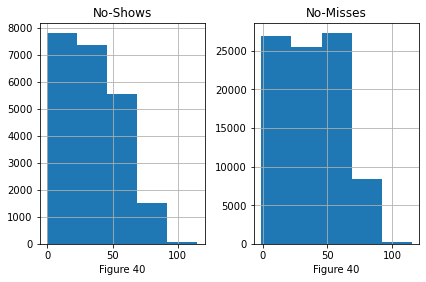

In [40]:
fig, axes = plt.subplots(1,2)
no_show['Age'].hist(bins = 5, ax=axes[0])
axes[0].set_title('No-Shows')
axes[0].set_xlabel("Figure " + str(i+1))
no_miss['Age'].hist(bins =5, ax=axes[1])
axes[1].set_title('No-Misses')
axes[1].set_xlabel("Figure " + str(i+1))
plt.tight_layout(pad=1.0);

Figure2 52-54. Histogram representations for age groups within the No-Show appointments and Non-Missed. Notice the third bin has more patients than its youngest demographic (the first bar) in No-Misses; compare this to the third bin for No-Shows, which is lower than their second-most youngest group (second bar). 

Note that these bars are not to scale to each other: the y-axis shows there are many more No-Miss patients than No-Shows. Let's compare:

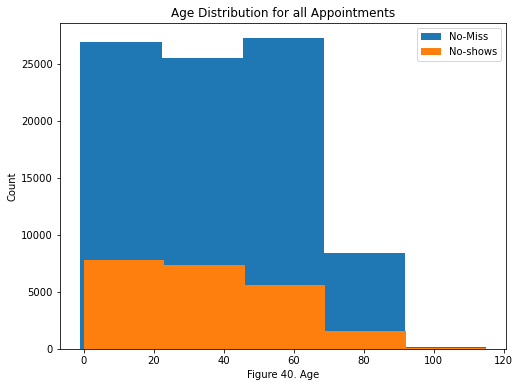

In [41]:
plt.figure(figsize=(8,6))
plt.hist(no_miss['Age'],bins=5,  label="No-Miss")
plt.hist(no_show['Age'],bins=5, label="No-shows")
plt.xlabel("Figure "+ str(i+1) + ". Age")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.title("Age Distribution for all Appointments");

Figure 53. Histogram representation of age groups among patients.

Lastly I wanted to know, How much do the no-shows represent the whole group?

In [42]:
(len(no_show)/len(df))*100

20.193255946510806

### Conclusion Q3.  What conditions (diabetes, hypertension, handicapped, alcoholism) or demographics (gender, age) can be associated with no-show appointments over non-missed appointments?
On average, the age of no-shows is younger than non-missed appointments, 34 and 38 respectively. The relative amount of no-show appointments to non-missed appointments should be also be noted as the former only represents about 20% of all recorded appointments.

<a id='Q4'></a>
## Research Question 4. Does alcholism affect appointment attendance?
I want to investigate whether alcoholism relates to a patient missing a scheduled appointment more often than those without alcoholism. First I need determine how many appointments had a Alcoholism patient and also determine how many of those patients missed an appointment:

In [43]:
tot_Alcoholism = df[df['Alcoholism'].isin([1])]
ns_Alcoholism = tot_Alcoholism[tot_Alcoholism['No-show'].isin(['Yes'])]
nm_Alcoholism = tot_Alcoholism[tot_Alcoholism['No-show'].isin(['No'])]

tot_nonAlc = df[df['Alcoholism'].isin([0])]
ns_nonAlc = tot_nonAlc[tot_nonAlc['No-show'].isin(['Yes'])]
nm_nonAlc = tot_nonAlc[tot_nonAlc['No-show'].isin(['No'])]

And calculate the percentages of no-show/no-miss within the Alcoholism and Non-Alcoholism populations:

In [44]:
A_noShow = (ns_Alcoholism['AppointmentID'].count()/tot_Alcoholism['AppointmentID'].count())*100
A_noMiss = (nm_Alcoholism['AppointmentID'].count()/tot_Alcoholism['AppointmentID'].count())*100

N_noShow = (ns_nonAlc['AppointmentID'].count()/tot_nonAlc['AppointmentID'].count())*100
N_noMiss = (nm_nonAlc['AppointmentID'].count()/tot_nonAlc['AppointmentID'].count())*100

Now let's visualize (again):

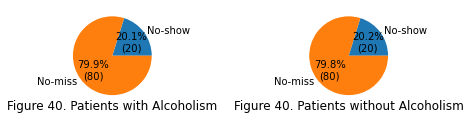

In [45]:
missed = ['No-show','No-miss']

alcoholic = [A_noShow,A_noMiss]
non_alcoholic = [N_noShow,N_noMiss]

plt.subplot(1,3,1)
plt.pie(alcoholic, labels = missed, autopct=lambda pct: func(pct, alcoholic))
plt.title("Figure "+ str(i+1)+". Patients with Alcoholism", y=-0.1)

plt.subplot(1,3,3)
plt.pie(non_alcoholic, labels = missed, autopct=lambda pct: func(pct, non_alcoholic))
plt.title("Figure " + str(i+1) + ". Patients without Alcoholism", y=-0.1);


Figures 54-55. Visual ratios of No-shows/No-misses within the Alcoholism and Non-Alcoholism groups.

### Conclusion Q3: Does alcholism affect appointment attendance?

The difference in the percentage of no shows and non-missed appointments between patients with and without alcoholism is negligible. It appears that having alcoholism does not relate to an increase in no-show appointments.

<a id='Q5'></a>
## Research Question 5. Do SMS reminders reduce the amount of no-show appointments?
We can see from above aggregated tables that there is a drop in no-show appointment when an SMS is received. Let's quantify:

In [46]:
df.groupby(["SMS_received","No-show"]).agg({"AppointmentID":"count"})

AppointmentID
SMS_received No-show               
0            No               62510
             Yes              12535
1            No               25698
             Yes               9784

Let's create variables to hold the data and then segment out the SMS recipients per no-show/no-miss groups.

In [47]:
ns_SMSy = no_show[no_show['SMS_received'].isin([1])]

'''(ns) no-show, (nm) no-miss'''
'''(SMSy) received SMS, (SMSn) did not receive SMS'''
ns_SMSy = no_show[no_show['SMS_received'].isin([1])]
ns_SMSy = ns_SMSy['AppointmentID'].count()
ns_SMSn = no_show[no_show['SMS_received'].isin([0])]
ns_SMSn = ns_SMSn['AppointmentID'].count()

nm_SMSy = no_miss[no_miss['SMS_received'].isin([1])]
nm_SMSy = nm_SMSy['AppointmentID'].count()
nm_SMSn = no_miss[no_miss['SMS_received'].isin([0])]
nm_SMSn = nm_SMSn['AppointmentID'].count()

Now let's confirm these groups:

In [48]:
print("No-Miss, no SMS: ", nm_SMSn)
print("No-Show, no SMS: ", ns_SMSn)
print("No-Miss, SMS: ", nm_SMSy)
print("No-Show, SMS: ", ns_SMSy)

No-Miss, no SMS:  62510
No-Show, no SMS:  12535
No-Miss, SMS:  25698
No-Show, SMS:  9784


Now, let's visualize and graph each group separately:

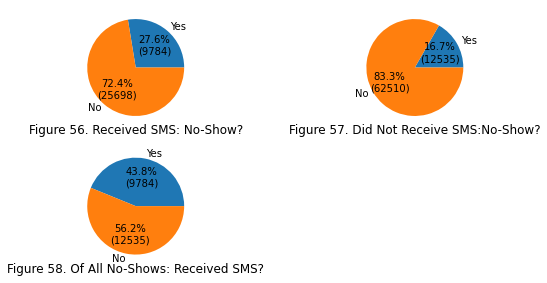

In [49]:
YN = ['Yes','No']
recSMS = [ns_SMSy,nm_SMSy]
noSMS = [ns_SMSn,nm_SMSn]
noShowYN = [ns_SMSy,ns_SMSn]

plt.subplot(2,3,1)
plt.pie(recSMS, labels = YN, autopct=lambda pct: func(pct, recSMS))
plt.title("Figure 56. Received SMS: No-Show?",y=-0.1)

plt.subplot(2,3,3)
plt.pie(noSMS, labels = YN, autopct=lambda pct: func(pct, noSMS))
plt.title("Figure 57. Did Not Receive SMS:No-Show?",y=-0.1)

plt.subplot(2,3,4)
plt.pie(noShowYN, labels = YN,autopct=lambda pct: func(pct, noShowYN))
plt.title("Figure 58. Of All No-Shows: Received SMS?",y=-0.1)
plt.tight_layout()


Figures 56-57. Percentage of Received/Did Not Receive who were No-Shows.

Figures 58. Percentage of all No-Shows who did or did not receive an SMS.

Next, let's graph all responses for appointments as a whole:

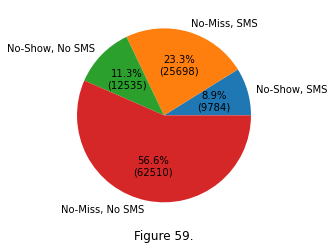

In [50]:
noshowSMS1 = ['No-Show, SMS','No-Miss, SMS', 'No-Show, No SMS','No-Miss, No SMS']
AllSMS = [ns_SMSy,nm_SMSy,ns_SMSn,nm_SMSn]

plt.pie(AllSMS, labels = noshowSMS1, autopct=lambda pct: func(pct,AllSMS))
plt.title("Figure 59.",y=-0.1);

Figure 59. Appointment statuses in relation to SMS responses, from largest to smallest groups: No-Miss, No SMS (red); No-Miss, SMS (orange); No-Show, No SMS (green); No-Show, SMS (blue).

### Conclusion Q5.  Do SMS reminders reduce the amount of no-show appointments?
The number of no-show appointment that received an SMS message is much smaller than the no-shows that did not receive an SMS (9,784 and 12,535 respectively). While the majority of those who received an SMS message did not miss their appointments (83.3%), of all no-show appointments, more than half (56.2%) did not receive an SMS message.

Moreover, more than half of all appointments overall did not receive an SMS message and still did not miss their appointment (56.6%; 62,510; "No-Miss, No SMS). The two largest groups are Non-Missed appointments -- regardless of an SMS message.

<a id='conclusions'></a>
## Conclusions
Based on the above research questions, I can conclude:
1. On average, regularly attended appointments are within 7 days of setting the date; no-show appointments were, on average, up to two weeks after the setting up the appointment.
2. Not all entries in the table are isolated events: That is, some patients miss more than one appointment, some patients attend more than one appointment, or have both a missed and attended appointment.
3. No-show patients are more likely to be younger than those that do not miss appointments.
4. Alcoholism does not relate to a patient's ability to attend a scheduled appointment.
5. People are more likely to no-show if they did not receive an SMS message.

The original purpose of the analysis was to possibly identify areas of intervention or demographics to focus resources on to increase attendance. Throughout my analysis I have been able to identify: the trendency of missed appointments to occur after a certain amount of time; both individual patients and age groups that could use some improvement in attendance; the fact that alcoholism doesn't effect appointment attendance; the vast majority of patients still attend their appointments, regardless of receiving an SMS reminder.

## Limitations
This data set does not explore the actual reasons why a person would miss an appointment -- it merely reports characteristics of the patient and some detail about the appointment (e.g., scheduled date, SMS reminder).  There are multiple reasons to cause no-shows and the combination of any number of factors can relate to this. 

Without additional information I could not use starting geographic location, since I am not familiar with the local area of Brazil; statistics for crime rate, access to transportation, etc. could affect appointment attendance, but the data was not available.

I could speculate why younger patients had more no-shows: perhaps they did not have an adult to transport them or had school during the appointment time -- a question that could probably be probed with data analysis but not performed in this report. However, in the end, there is not enough information to explain the cause of the age differences.